<a href="https://colab.research.google.com/github/vahedshaik/cmpe258_neural_networks/blob/main/Asst3_part_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn
from typing import Callable

In [ ]:
# Generate non-linear data and Initialize weights and bias
n = 500
input_dim = 3
X = torch.rand(n, input_dim).float()
print('Input tensor shape =', X.shape)
weights = torch.tensor([[2.5, -3.5, 7.0]]).T
bias = torch.tensor([[8]])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)
y_true = (torch.einsum('ij, jk -> ik', (X**3),  weights) + torch.einsum('ij, jk -> ik', (X**2),  weights) + torch.einsum('ij, jk -> ik', X, weights) + bias).float()
print('Function output shape =', y_true.shape)


Input tensor shape = torch.Size([500, 3])
Weights shape = torch.Size([3, 1])
Bias shape = torch.Size([1, 1])
Function output shape = torch.Size([500, 1])


In [ ]:
output_dim = 1
hidden_dim = 16
learning_rate = 0.01
num_epochs = 200

In [ ]:
class NonLinearModel(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, hidden_dim)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(hidden_dim, output_dim)

  def forward(self, X):
    linear1_out = self.linear1(X)
    relu1_out = self.relu1(linear1_out)
    linear2_out = self.linear2(relu1_out)
    relu2_out = self.relu2(linear2_out)
    linear3_out = self.linear3(relu2_out)
    return linear3_out


In [ ]:
def train(model, X, y_true, loss, optimizer, lr, num_epochs):
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss_value = loss(y_pred, y_true)
    print(f'Epoch {epoch}, loss {loss_value}')
    loss_value.backward()
    optimizer.step()

In [ ]:
# Initialize loss, model, and optimizer objects and train the mode
loss = nn.MSELoss()
model = NonLinearModel(input_dim, output_dim, hidden_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train(model, X, y_true, loss, optimizer, learning_rate, num_epochs)

Epoch 0, loss 245.36122131347656
Epoch 1, loss 233.7161865234375
Epoch 2, loss 221.05149841308594
Epoch 3, loss 204.0420379638672
Epoch 4, loss 177.1625518798828
Epoch 5, loss 130.5032501220703
Epoch 6, loss 64.5416030883789
Epoch 7, loss 45.841373443603516
Epoch 8, loss 44.448726654052734
Epoch 9, loss 41.1346549987793
Epoch 10, loss 39.914337158203125
Epoch 11, loss 37.16554260253906
Epoch 12, loss 36.190338134765625
Epoch 13, loss 33.60060501098633
Epoch 14, loss 33.017425537109375
Epoch 15, loss 30.370899200439453
Epoch 16, loss 30.578292846679688
Epoch 17, loss 27.668724060058594
Epoch 18, loss 29.619699478149414
Epoch 19, loss 26.01295280456543
Epoch 20, loss 31.829090118408203
Epoch 21, loss 26.107627868652344
Epoch 22, loss 39.02132034301758
Epoch 23, loss 26.368789672851562
Epoch 24, loss 45.627967834472656
Epoch 25, loss 24.394296646118164
Epoch 26, loss 44.073326110839844
Epoch 27, loss 22.874778747558594
Epoch 28, loss 43.13494873046875
Epoch 29, loss 21.51934051513672
Epoc


# Visualize results


tensor(4.9641, grad_fn=<MseLossBackward0>)
tensor(4.0676, grad_fn=<MseLossBackward0>)


<bound method Axes3D.set_zlabel of <Axes3DSubplot:xlabel='x1', ylabel='x2'>>

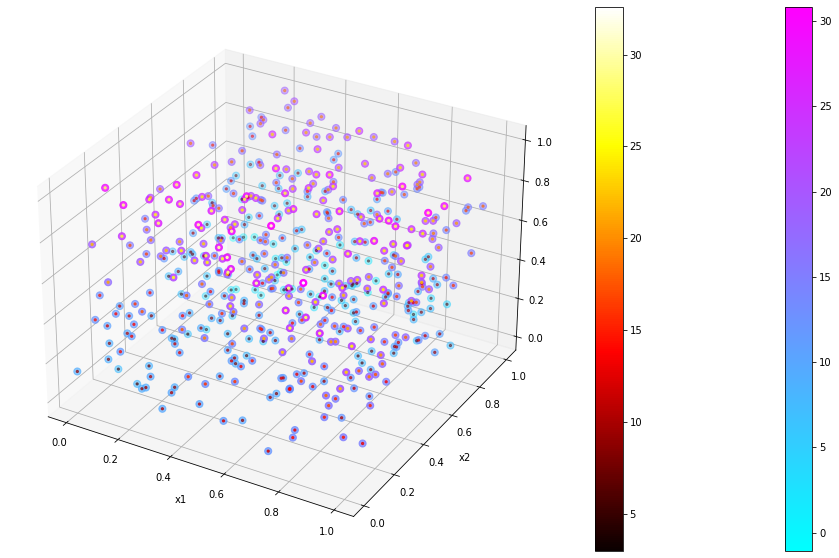

In [ ]:
optimizer.zero_grad()
y_pred = model(X)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_value.backward()
optimizer.step()

y_pred = model(X)
loss_value = loss(y_pred, y_true)
print(loss_value)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred.detach().numpy(), cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel

We can observe from the generated plot that the function represented by 'our function' does not match the 'underlying function' (as indicated by the color bar). This discrepancy is because we only ran a single epoch, which was insufficient for the network to optimize the weights and biases to minimize the loss and approach the underlying function. However, by analyzing the loss values over multiple epochs, we can see that as the number of epochs increases, the MSE loss reduces, indicating that the network is accurately learning the underlying function.